![](../graphics/microsoftlogo.png)

# Workshop: Unlocking AI Potential for the Data Professional - Azure OpenAI

#### <i>A Microsoft Course from Microsoft Engineering and the FastTrack Team</i>

<p style="border-bottom: 1px solid lightgrey;"></p>

<img style="float: left; margin: 0px 15px 15px 0px;" src="https://raw.githubusercontent.com/microsoft/sqlworkshops/master/graphics/textbubble.png"> <h2>Course Notebook: Module 1</h2>

Welcome to this Microsoft solutions workshop on [*Unlocking AI Potential for the Data Professional with Azure OpenAI*](https://github.com/sqlserverworkshops/OpenAI-DataPro/tree/main). In this Notebook, you'll apply the concepts you learned in this Module.

This Notebook contains recipes for some common applications of machine learning. You'll need a working knowledge of [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), [numpy](http://www.numpy.org/), and, of course, [scikit-learn](http://scikit-learn.org/stable/) to benefit from it.

In [1]:
# <help:cookbook_setup>
%matplotlib inline

##Training with k-Fold Cross-Validation

This recipe repeatedly trains a [logistic regression](http://en.wikipedia.org/wiki/Logistic_regression) classifier over different subsets (folds) of sample data. It attempts to match the percentage of each class in every fold to its percentage in the overall dataset ([stratification](http://en.wikipedia.org/wiki/Stratified_sampling)). It evaluates each model against a test set and collects the confusion matrices for each test fold into a `pandas.Panel`.

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

In [2]:
# <help:scikit_cross_validation>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
import pandas
import sklearn
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold

# load the iris dataset
dataset = sklearn.datasets.load_iris()

# define feature vectors (X) and target (y)
X = dataset.data   
y = dataset.target 
labels = dataset.target_names 
labels  

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [3]:
# <help:scikit_cross_validation>
# use log reg classifier
clf = LogisticRegression()

cms = {}
scores   = []
cv = StratifiedKFold(y, n_folds=10)
for i, (train, test) in enumerate(cv):
    # train then immediately predict the test set
    y_pred = clf.fit(X[train], y[train]).predict(X[test])
    # compute the confusion matrix on each fold, convert it to a DataFrame and stash it for later compute
    cms[i] = pandas.DataFrame(metrics.confusion_matrix(y[test], y_pred), columns=labels, index=labels)
    # stash the overall accuracy on the test set for the fold too
    scores.append(metrics.accuracy_score(y[test], y_pred))

# Panel of all test set confusion matrices
pl = pandas.Panel(cms)
cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
cm

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,45,5
virginica,0,1,49


In [4]:
# <help:scikit_cross_validation>
# accuracy predicting the test set for each fold
scores

[0.93333333333333335,
 0.93333333333333335,
 0.8666666666666667,
 1.0,
 1.0,
 0.93333333333333335,
 0.93333333333333335,
 1.0,
 1.0,
 1.0]

## Principal Component Analysis Plots
This recipe performs a [PCA](http://en.wikipedia.org/wiki/Principal_component_analysis) and plots the data against the first two principal components in a scatter plot. It then prints the [eigenvalues and eigenvectors of the covariance matrix](http://www.quora.com/What-is-an-eigenvector-of-a-covariance-matrix) and finally prints the precentage of total variance explained by each component. 

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to human-readable names of the classes.

In [5]:
# <help:scikit_pca>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from __future__ import division
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the iris dataset
dataset = sklearn.datasets.load_iris()
# define feature vectors (X) and target (y)
X = dataset.data   
y = dataset.target 
labels = dataset.target_names  

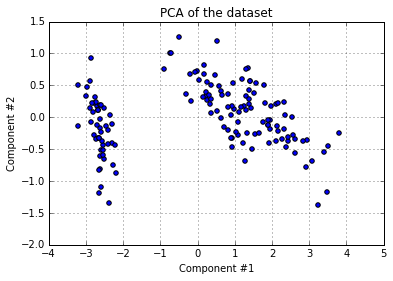

In [6]:
# <help:scikit_pca>
# define the number of components to compute, recommend n_components < y_features
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# plot the first two principal components
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid()
plt.title('PCA of the dataset')
ax.set_xlabel('Component #1') 
ax.set_ylabel('Component #2')
plt.show()

In [7]:
# <help:scikit_pca>
# eigendecomposition on the covariance matrix
cov_mat = np.cov(X_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  1.00000000e+00   2.27318015e-17]
 [  0.00000000e+00   1.00000000e+00]]

Eigenvalues 
[ 4.22484077  0.24224357]


In [8]:
# <help:scikit_pca>
# prints the percentage of overall variance explained by each component
print(pca.explained_variance_ratio_)

[ 0.92461621  0.05301557]


## K-Means Clustering Plots

This recipe performs a [K-means clustering](http://en.wikipedia.org/wiki/K-means_clustering) `k=1..n` times. It prints and plots the the within-clusters sum of squares error for each `k` (i.e., inertia) as an indicator of what value of `k` might be appropriate for the given dataset.

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to human-readable names of the classes. To change the number of clusters, modify `k`.

k = 1, inertia= 680.824400
k = 2, inertia= 152.368706
k = 3, inertia= 78.940841
k = 4, inertia= 57.317873
k = 5, inertia= 46.535582


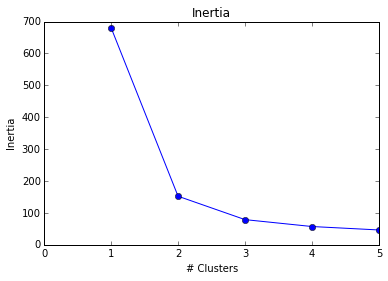

In [9]:
# <help:scikit_k_means_cluster>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

# load datasets and assign data and features
dataset = sklearn.datasets.load_iris()
# define feature vectors (X) and target (y)
X = dataset.data
y = dataset.target

# set the number of clusters, must be >=1
n = 6
inertia = [np.NaN]

# perform k-means clustering over i=0...k
for k in range(1,n):
    k_means_ = KMeans(n_clusters=k)
    k_means_.fit(X)
    print('k = %d, inertia= %f' % (k, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
    
# plot the SSE of the clusters for each value of i
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(n))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clusters')
plt.show()   

## SVM Classifier Hyperparameter Tuning with Grid Search

This recipe performs a [grid search](http://en.wikipedia.org/wiki/Hyperparameter_optimization) for the best settings for a [support vector machine,](http://en.wikipedia.org/wiki/Support_vector_machine) predicting the class of each flower in the dataset. It splits the dataset into training and test instances once.

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).  To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to human-readable names of the classes. Modify `parameters` to change the grid search space or the `scoring='accuracy'` value to optimize a different metric for the classifier (e.g., precision, recall).

In [10]:
#<help_scikit_grid_search>
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize

# load datasets and features
dataset = sklearn.datasets.load_iris()
# define feature vectors (X) and target (y)
X = dataset.data
y = dataset.target
labels = dataset.target_names

# separate datasets into training and test datasets once, no folding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
#<help_scikit_grid_search>
#define the parameter dictionary with the kernels of SVCs
parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-2], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [1, 3, 5], 'C': [1, 10, 100, 1000]}
]

# find the best parameters to optimize accuracy
svc_clf = SVC(C=1, probability= True)
clf = GridSearchCV(svc_clf, parameters, cv=5, scoring='accuracy') #5 folds
clf.fit(X_train, y_train) #train the model 
print("Best parameters found from SVM's:")
print clf.best_params_ 
print("Best score found from SVM's:")    
print clf.best_score_

Best parameters found from SVM's:
{'kernel': 'linear', 'C': 1}
Best score found from SVM's:
0.983333333333


## Plot ROC Curves
This recipe plots the [reciever operating characteristic (ROC) curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) for a [SVM classifier](http://en.wikipedia.org/wiki/Support_vector_machine) trained over the given dataset.

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set) which has three classes. The recipe uses a [one-vs-the-rest strategy](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest) to create the [binary classifications](http://en.wikipedia.org/wiki/Binary_classification) appropriate for ROC plotting. To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to human-readable names of the classes.

Note that the recipe adds noise to the iris features to make the ROC plots more realistic. Otherwise, the classification is nearly perfect and the plot hard to study. **Remove the noise generator if you use your own data!**

In [12]:
# <help:scikit_roc>
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize

# load iris, set and data
dataset = sklearn.datasets.load_iris()
X = dataset.data
# binarize the output for binary classification
y = label_binarize(dataset.target, classes=[0, 1, 2])
labels = dataset.target_names

In [13]:
# <help:scikit_roc>
# add noise to the features so the plot is less ideal
# REMOVE ME if you use your own dataset!
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [14]:
# <help:scikit_roc>
# split data for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# classify instances into more than two classes, one vs rest
# add param to create probabilities to determine Y or N as the classification
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# fit estiamators and return the distance of each sample from the decision boundary
y_score = clf.fit(X_train, y_train).decision_function(X_test)

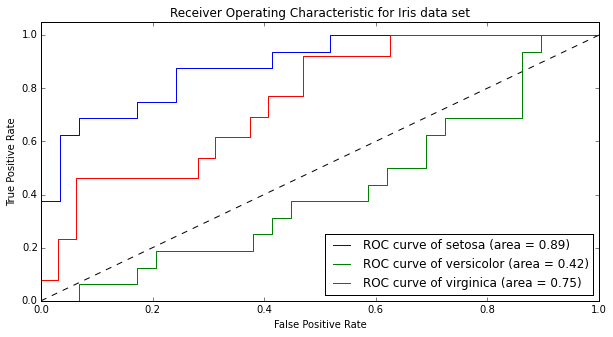

In [15]:
# <help:scikit_roc>
# plot the ROC curve, best for it to be in top left corner
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--') # add a straight line representing a random model 
for i, label in enumerate(labels):
    # false positive and true positive rate for each class
    fpr, tpr, _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    # area under the curve (auc) for each class
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve of {0} (area = {1:0.2f})'.format(label, roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic for Iris data set')
plt.xlabel('False Positive Rate') # 1- specificity
plt.ylabel('True Positive Rate') # sensitivity
plt.legend(loc="lower right")
plt.show()

## Build a Transformation and Classification Pipeline 

This recipe builds a [transformation and training pipeline](http://scikit-learn.org/stable/modules/pipeline.html) for a model that can classify a snippet of text as belonging to one of 20 [USENET](http://en.wikipedia.org/wiki/Usenet) [newgroups](http://en.wikipedia.org/wiki/Usenet_newsgroup). It then prints the [precision, recall, and F1-score](http://en.wikipedia.org/wiki/Precision_and_recall) for predictions over a held-out test set as well as the confusion matrix.

This recipe defaults to using the [20 USENET newsgroup](http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.html) dataset. To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to human-readable names of the classes. Then modify the pipeline components to perform appropriate transformations for your data.

<div class="alert alert-block alert-warning" style="margin-top: 20px">**Warning:** Running this recipe with the sample data may consume a significant amount of memory.</div>

In [16]:
# <help:scikit_pipeline>
import pandas
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups

# download the newsgroup dataset
dataset = fetch_20newsgroups('all')

# define feature vectors (X) and target (y) 
X = dataset.data
y = dataset.target
labels = dataset.target_names
labels

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
# <help:scikit_pipeline>
# split data holding out 30% for testing the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# pipelines concatenate functions serially, output of 1 becomes input of 2
clf = Pipeline([
    ('vect', HashingVectorizer(analyzer='word', ngram_range=(1,3))), # count frequency of words, using hashing trick
    ('tfidf', TfidfTransformer()), # transform counts to tf-idf values,
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
])

In [18]:
# <help:scikit_pipeline>
# train the model and predict the test set
y_pred = clf.fit(X_train, y_train).predict(X_test)

# standard information retrieval metrics
print metrics.classification_report(y_test, y_pred, target_names=labels)

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.95      0.90       137
           comp.graphics       0.89      0.84      0.86       178
 comp.os.ms-windows.misc       0.85      0.90      0.88       168
comp.sys.ibm.pc.hardware       0.85      0.78      0.81       180
   comp.sys.mac.hardware       0.95      0.83      0.89       174
          comp.windows.x       0.88      0.91      0.90       193
            misc.forsale       0.78      0.92      0.84       157
               rec.autos       0.93      0.89      0.91       188
         rec.motorcycles       0.96      0.95      0.95       185
      rec.sport.baseball       0.94      0.95      0.95       183
        rec.sport.hockey       0.92      0.98      0.95       180
               sci.crypt       0.95      0.97      0.96       181
         sci.electronics       0.93      0.80      0.86       180
                 sci.med       0.95      0.94      0.95       159
         

In [19]:
# <help:scikit_pipeline>
# show the confusion matrix in a labeled dataframe for ease of viewing
index_labels = ['{} {}'.format(i, l) for i, l in enumerate(labels)]
pandas.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=index_labels)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0 alt.atheism,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,0,1
1 comp.graphics,1,150,5,4,1,7,3,0,0,0,2,1,1,1,1,0,1,0,0,0
2 comp.os.ms-windows.misc,0,1,152,3,0,6,2,0,0,0,1,0,1,0,1,1,0,0,0,0
3 comp.sys.ibm.pc.hardware,0,3,10,140,4,3,7,1,0,1,2,3,2,0,3,1,0,0,0,0
4 comp.sys.mac.hardware,1,2,2,4,145,4,4,0,1,3,0,1,2,2,1,0,0,2,0,0
5 comp.windows.x,0,5,5,2,0,176,1,1,0,0,1,1,0,0,1,0,0,0,0,0
6 misc.forsale,0,2,0,3,0,0,144,2,0,1,2,1,1,0,0,1,0,0,0,0
7 rec.autos,1,1,0,0,1,1,5,167,3,3,1,0,2,0,1,0,1,0,1,0
8 rec.motorcycles,2,0,0,0,0,0,4,2,175,0,1,0,0,0,1,0,0,0,0,0
9 rec.sport.baseball,0,1,0,0,0,0,3,1,1,174,2,0,0,1,0,0,0,0,0,0


<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">This notebook was created using <a href="https://knowledgeanyhow.org">IBM Knowledge Anyhow Workbench</a>.  To learn more, visit us at <a href="https://knowledgeanyhow.org">https://knowledgeanyhow.org</a>.</div>
    </div>
</div>